In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.signal as sg
import matplotlib.pyplot as plt
from neuropy import plotting
import subjects

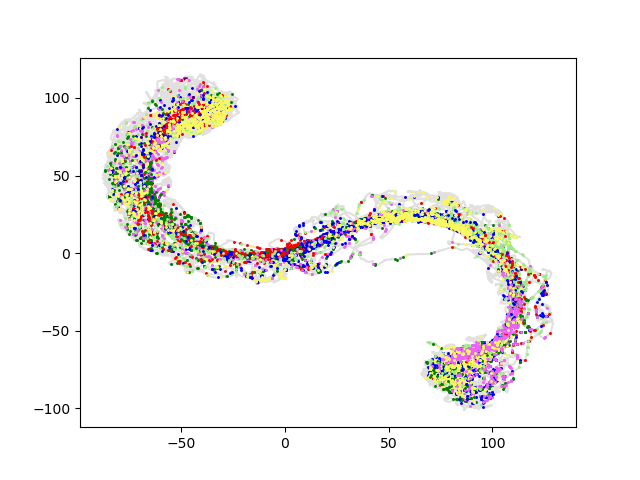

In [5]:
from neuropy.analyses.placefields import Pf2D
from matplotlib.cm import get_cmap

sess = subjects.sd.ratRday2[0]
maze = sess.paradigm["maze"].flatten()
position = sess.position.time_slice(*maze)
neurons = sess.neurons.get_neuron_type("pyr").time_slice(*maze)

pf = Pf2D(neurons, position, speed_thresh=20, frate_thresh=8)
_, ax = plt.subplots()

ax.plot(position.x, position.y, color="#e2dfdf", zorder=-1)

# cmap = get_cmap('Accent',8).colors
cmap = ["r", "g", "b", "#9eec89", "#eb63f8", "#f8f863"] * 40

for i, (x, y) in enumerate(pf.spk_pos[:30]):
    ax.scatter(x, y, marker=".", color=cmap[i], zorder=0, s=5)